## Von Mises

We can plot the plastic zone shape for Von Mises yield criteria

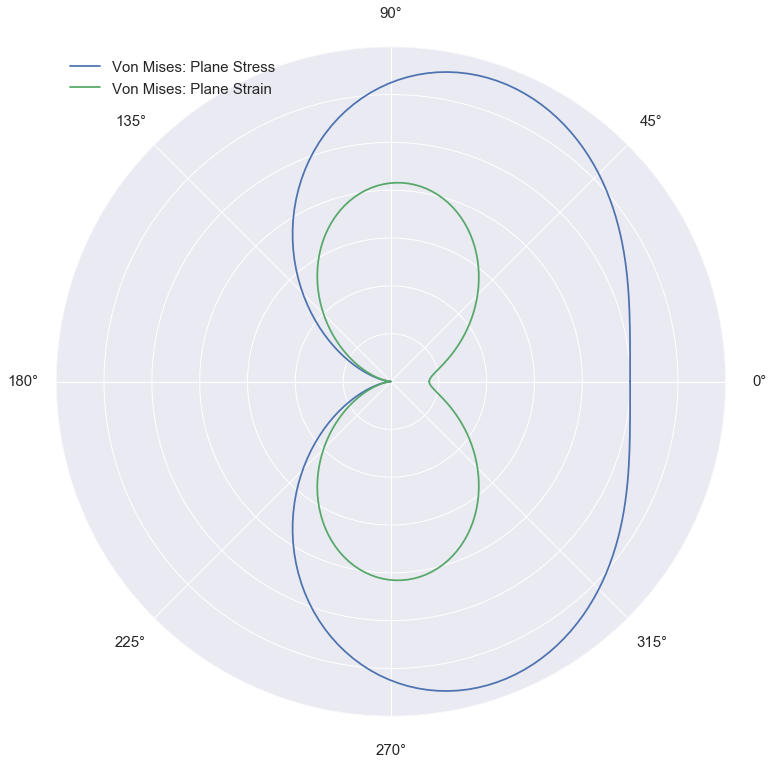

In [7]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb
sb.set(font_scale=1.5)
%matplotlib inline

theta = np.linspace(0,2*np.pi,200)
nu = 0.3
rp_stress = np.cos(theta/2)**2*(1+3*np.sin(theta/2)**2)
rp_strain = np.cos(theta/2)**2*(1-4*nu+4*nu**2+3*np.sin(theta/2)**2)
fig = plt.figure(figsize=(12,12))
ax = plt.subplot(111,projection='polar')
ax.set_yticklabels([])
plt.plot(theta,rp_stress,label='Von Mises: Plane Stress')
plt.plot(theta,rp_strain,label='Von Mises: Plane Strain')
plt.legend(loc='best')

## Tresca Yield

For tresca yield we need to determine $\theta_t$ before we can plot, since that determines whether $\sigma_2$ or $\sigma_3$ give the minimu stress


In [9]:
theta_t = 2*np.arcsin(1-2*nu)

We can now formulate the plane strain plastic zone shape for Tresca Yield

In [16]:
rp_tr_strain = np.zeros(len(theta)) #initiate array of zeros
for i in range(len(theta)):
    if theta[i] > theta_t and theta[i] < 2*np.pi - theta_t:
        rp_tr_strain[i] = 2.0*np.cos(theta[i]/2)**2*np.sin(theta[i]/2)**2
    else:
        rp_tr_strain[i] = 1.0/(2.0)*np.cos(theta[i]/2)**2*(1-2*nu+np.sin(theta[i]/2))**2

In plane stress tresca yield is given by

In [18]:
rp_tr_stress = 1./(2.)*np.cos(theta/2)**2*(1+np.sin(theta/2))**2

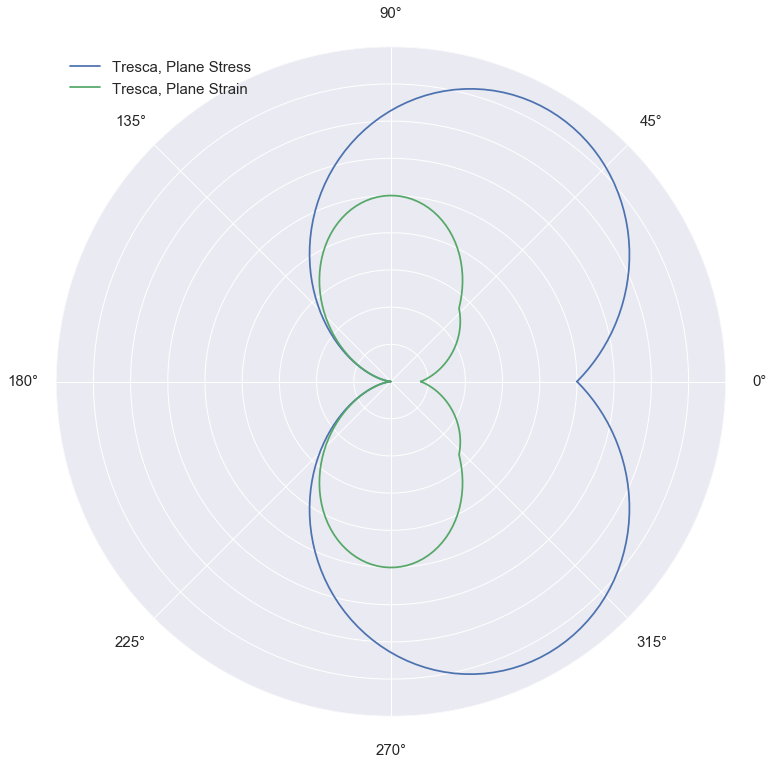

In [20]:
fig = plt.figure(figsize=(12,12))
ax = plt.subplot(111,projection='polar')
ax.set_yticklabels([])
ax.plot(theta,rp_tr_stress,label='Tresca, Plane Stress')
ax.plot(theta,rp_tr_strain,label='Tresca, Plane Strain')
ax.legend(loc='best')

The threshold angle, $\theta_t$ is a function of the Poisson's material, will have a different effect in different materials.

The physical limits to Poissons ratio are $-1 < \nu < 0.5$, but most engineering materials lie in $0 < \nu < 0.5$.

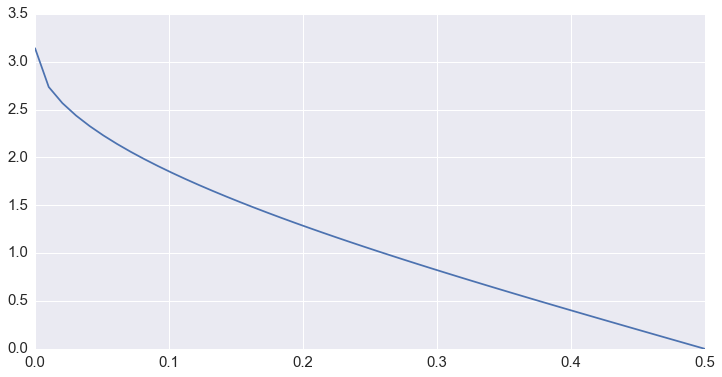

In [22]:
nu = np.linspace(0,0.5)
theta_t = 2*np.arcsin(1-2*nu)
plt.figure(figsize=(12,6))
plt.plot(nu,theta_t)

We can also compare Tresca and Von Mises on the same scale



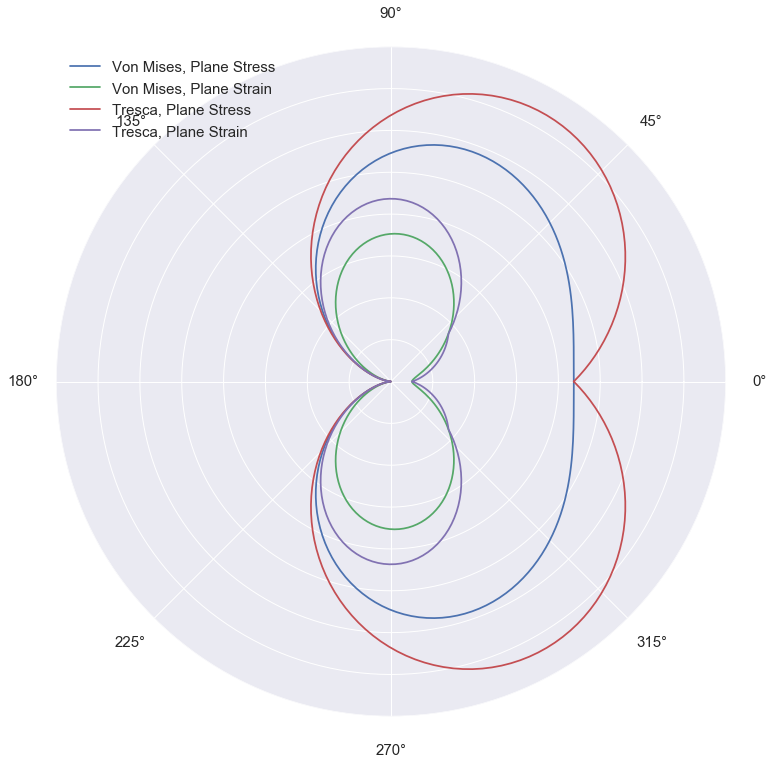

In [25]:
def beta(a,w):
    return 1.122 - 0.231*a/w + 10.55*(a/w)**2 - 21.71*(a/w)**3 + 30.82*(a/w)**4
def KI(a,w,s):
    return s*np.sqrt(np.pi*a)*beta(a,w)
a = 2
w = 6
s = 10 #ksi
sy = 50 #ksi
v = 0.33
th = np.linspace(0,2*np.pi,200)
rp_vm_stress = KI(a,w,s)**2/(2*np.pi*sy**2)*np.cos(th/2)**2*(1+3*np.sin(th/2)**2)
rp_vm_strain = KI(a,w,s)**2/(2*np.pi*sy**2)*np.cos(th/2)**2*(1-4*v+4*v**2+3*np.sin(th/2)**2)
th1 = 2*np.arcsin(1-2*v)
rp_tr_stress = KI(a,w,s)**2/(2*np.pi*sy**2)*np.cos(th/2)**2*(1+np.sin(th/2))**2
rp_tr_strain = np.zeros(len(th)) #initiate array of zeros
for i in range(len(th)):
    if th[i] > th1 and th[i] < 2*np.pi - th1:
        rp_tr_strain[i] = 2*KI(a,w,s)**2/(np.pi*sy**2)*np.cos(th[i]/2)**2*np.sin(th[i]/2)**2
    else:
        rp_tr_strain[i] = KI(a,w,s)**2/(2*np.pi*sy**2)*np.cos(th[i]/2)**2*(1-2*v+np.sin(th[i]/2))**2
fig = plt.figure(figsize=(12,12))
ax = plt.subplot(111,projection='polar')
ax.set_yticklabels([])
ax.plot(th,rp_vm_stress,label='Von Mises, Plane Stress')
ax.plot(th,rp_vm_strain,label='Von Mises, Plane Strain')
ax.plot(th,rp_tr_stress,label='Tresca, Plane Stress')
ax.plot(th,rp_tr_strain,label='Tresca, Plane Strain')
ax.legend(loc='best')